## Dataset overview
* This dataset is about used cars from German eBay website


* The size of this dataset is 50000 rows * 20 columns


* 12 columns in object (string), 5 columns in integer, and 3 columns in datetime


* Some columns have null values, but none have more than 20% null value

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [205]:
autos = pd.read_csv("autos.csv", encoding="Latin-1")
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [206]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

## Clean up column names
* The column names need to be cleaned up, because the original column names are in camelcase

In [207]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [208]:
cleaned_cols = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gear_box', 'power_PS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

autos.columns = cleaned_cols
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gear_box,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Initial exploration and further data cleaning

In [209]:
autos.describe()

,registration_year,power_PS,registration_month,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


* It could be found that the price and odometer columns are numeric values stored in text


* These data should be cleaned to numeric values

In [210]:
autos["price"] = autos["price"].str.replace("$", "")
autos["price"] = autos["price"].str.replace(",", "")
autos["price"] = autos["price"].astype("int")

In [211]:
autos["odometer"] = autos["odometer"].str.replace("km", "")
autos["odometer"] = autos["odometer"].str.replace(",", "")

In [212]:
autos["odometer"] = autos["odometer"].astype("int")
autos = autos.rename(index=str, columns={"odometer": "odometer_km"})

## Explore the price and odometer_km columns
* The price column contains some outliers, which should be removed

In [213]:
autos["price"].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [214]:
autos["price"].unique().shape

(2357,)

In [215]:
autos["price"].value_counts().sort_index(ascending=False).head(15)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
Name: price, dtype: int64

In [216]:
autos["price"].value_counts().sort_index(ascending=True).head(10)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
Name: price, dtype: int64

In [217]:
autos = autos[autos["price"].between(100, 500000)]

In [218]:
autos["odometer_km"].unique().shape

(13,)

In [219]:
autos["odometer_km"].value_counts().sort_index(ascending=False).head(15)

150000    31212
125000     5037
100000     2101
90000      1733
80000      1412
70000      1214
60000      1153
50000      1009
40000       814
30000       777
20000       757
10000       245
5000        760
Name: odometer_km, dtype: int64

In [220]:
autos["odometer_km"].describe()

count     48224.000000
mean     125919.148142
std       39543.339640
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [221]:
autos["odometer_km"].value_counts().sort_index(ascending=True).head(15)

5000        760
10000       245
20000       757
30000       777
40000       814
50000      1009
60000      1153
70000      1214
80000      1412
90000      1733
100000     2101
125000     5037
150000    31212
Name: odometer_km, dtype: int64

## Visualize te ditribution of the price column and the odometer_km column
* The distribution of the price column is positively-skewed
* The distribution of the odometer_km column is negatively-skewed

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


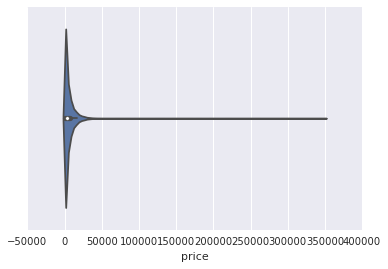

In [222]:
sns.violinplot(autos["price"]);

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


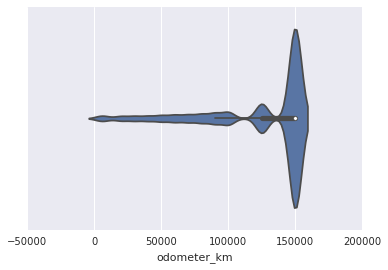

In [223]:
sns.violinplot(autos["odometer_km"]);

## Explore the date columns
* The distribution for the data_crawled column is uniform (around 3% for each date), from 2016-03-05 to 2016-04-07  


* The distribution for the Ad_created column is negatively-skewed, from 2015-06-11 to 2016-04-07. Dates after 2016-03-05 start to show higher percentage (around 3%)  


* The distribution for the last_seen column is negatively-skewed, from 2016-03-05 to 2016-04-07. The last three dates show higher percentage (larger than 10% each)


* There are some incorrect values in the registration_year columns

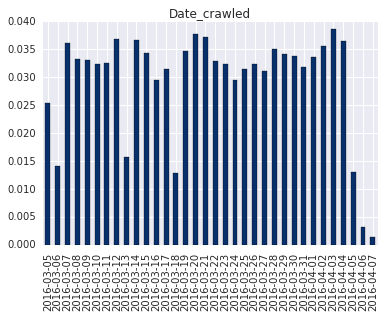

In [224]:
autos["date_crawled"].str[:10].value_counts(normalize=True, dropna=False).sort_index().plot(kind="bar", title="Date_crawled", colormap="Blues_r")

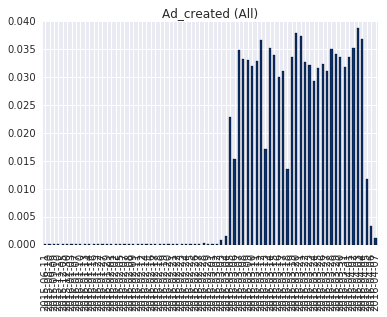

In [225]:
autos["ad_created"].str[:10].value_counts(normalize=True, dropna=False).sort_index().plot(kind="bar", title="Ad_created (All)", colormap="Blues_r")

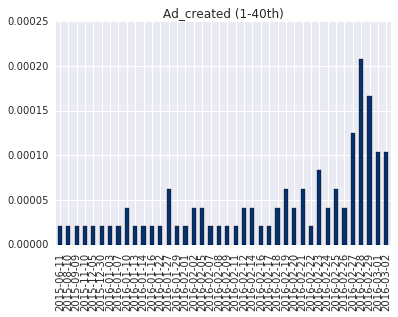

In [226]:
autos["ad_created"].str[:10].value_counts(normalize=True, dropna=False).sort_index()[:40].plot(kind="bar", title="Ad_created (1-40th)", colormap="Blues_r")

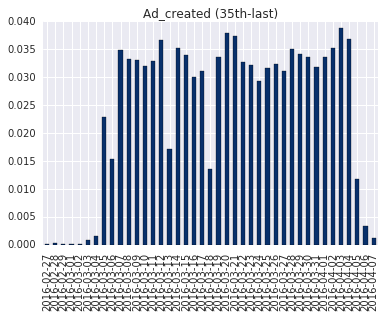

In [227]:
autos["ad_created"].str[:10].value_counts(normalize=True, dropna=False).sort_index()[35:].plot(kind="bar", title="Ad_created (35th-last)", colormap="Blues_r")

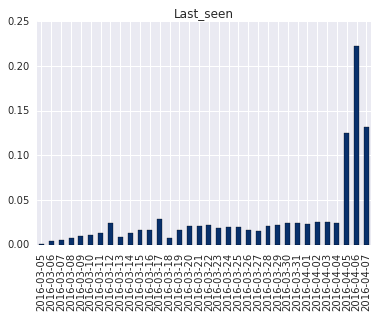

In [228]:
autos["last_seen"].str[:10].value_counts(normalize=True, dropna=False).sort_index().plot(kind="bar", title="Last_seen", colormap="Blues_r")

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


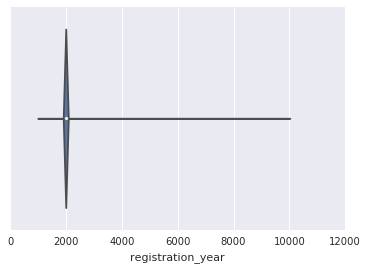

In [229]:
sns.violinplot(autos["registration_year"])

In [230]:
autos["registration_year"].describe()

count    48224.000000
mean      2004.730964
std         87.897388
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

## Dealing with the incorrect registration year data
* Remove the data with incorrect registration year


* After removing the incorrecct data, the distribution looks negatively-skewed, and most of the data is around year 2000

In [231]:
autos = autos[autos["registration_year"].between(1900, 2100)]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


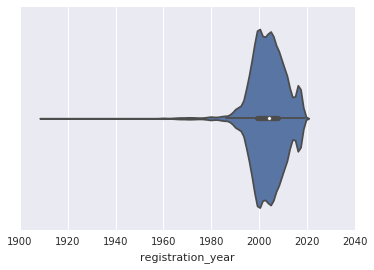

In [232]:
sns.violinplot(autos["registration_year"])

In [233]:
autos["registration_year"].describe()

count    48205.000000
mean      2003.490053
std          7.511679
min       1910.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       2019.000000
Name: registration_year, dtype: float64

## Explore price by brand
* VW has the highest percentage, around 20%


* Brands that have more than 5% share are VW, BMW, Opel, Mercedes, Audi and Ford


* For the above-mentioned brands, Audi has the highest average price, and Opel has the lowest average price


* For the above-mentioned brands, all brands show a positively-skewed distribution

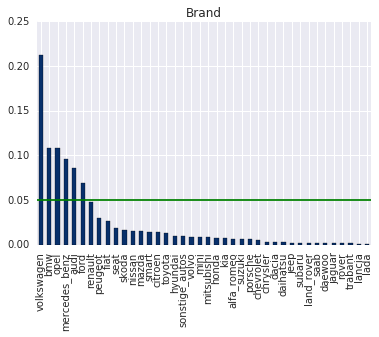

In [234]:
autos["brand"].value_counts(normalize=True).plot(kind="bar", title="Brand", cmap="Blues_r")
plt.axhline(0.05, c="green")

In [235]:
autos["brand"].value_counts(normalize=True)[:10]

volkswagen       0.212986
bmw              0.108765
opel             0.108288
mercedes_benz    0.095965
audi             0.086028
ford             0.069619
renault          0.047837
peugeot          0.029458
fiat             0.025972
seat             0.018919
Name: brand, dtype: float64

In [236]:
autos_VW = autos[autos["brand"] == "volkswagen"]
autos_VW["price"].describe()

count    10267.000000
mean      5366.253433
std       6154.641272
min        100.000000
25%       1250.000000
50%       2999.000000
75%       7450.000000
max      64500.000000
Name: price, dtype: float64

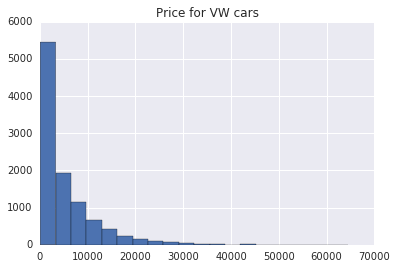

In [237]:
plt.hist(autos_VW["price"], bins=20)
plt.title("Price for VW cars")

In [238]:
above_5percent_autos = autos_VW = autos[
    (autos["brand"] == "volkswagen") |
    (autos["brand"] == "bmw") | 
    (autos["brand"] == "opel") |
    (autos["brand"] == "mercedes_benz") |
    (autos["brand"] == "audi") |
    (autos["brand"] == "ford") ]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


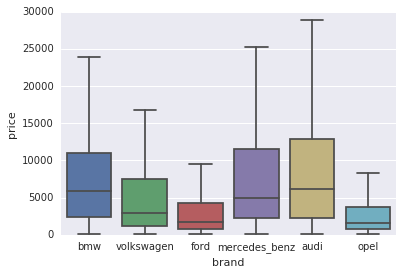

In [240]:
sns.boxplot(x="brand", y="price", data=above_5percent_autos, showfliers=False)

In [269]:
above_5percent_autos.groupby("brand").agg({"price":np.mean}).sort_values("price",ascending=False)

,price
brand,
audi,9259.510248
mercedes_benz,8570.768699
bmw,8310.138470
volkswagen,5366.253433
ford,3756.991955
opel,2971.608238
